In [1]:
library(Seurat)
library(dplyr)
library(Matrix)
library(patchwork)
library(ggplot2)

pbmc.data<-Read10X(data.dir="/home/liusong/scRNA/endometriosis/V2data/aggregating/21samples/outs/count/filtered_feature_bc_matrix")

#remove ribsome genes#
rb.genes<-rownames(pbmc.data)[grep("^RP[SL]",rownames(pbmc.data))]
pbmc.data<-pbmc.data[!(rownames(pbmc.data) %in% rb.genes),]

pbmc <- CreateSeuratObject(count = pbmc.data)
pbmc@meta.data$sampleID<-sub("^.................","",rownames(pbmc@meta.data)) #sub

Loading required package: SeuratObject

Loading required package: sp


Attaching package: 'SeuratObject'


The following object is masked from 'package:base':

    intersect



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"


In [3]:
EUstromals<-read.csv(file="/home/liusong/scRNA/endometriosis/V2data/scanpy/21samples/allmyEUstromas/obs.csv",header=TRUE)
head(EUstromals)
head(pbmc@meta.data)
stromal<-subset(pbmc,cells=as.character(EUstromals$X))
stromal@meta.data$Menstrual<-EUstromals$Phase

,X,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes,sampleID,Phase,leiden,louvain,myname,celltype
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>
1,AAACCTGAGGCAGGTT-1,2849,7546,390,5.168301,2849,1,P,3,3,stroma3,stroma
2,AAACCTGAGGTCATCT-1,3541,10273,399,3.883968,3540,1,P,9,6,stroma9,stroma
3,AAACCTGAGTGTTAGA-1,1953,4108,243,5.915287,1953,1,P,0,0,stroma0,stroma
4,AAACCTGCAACAACCT-1,2300,5373,296,5.509027,2300,1,P,0,0,stroma0,stroma
5,AAACCTGGTAGCCTCG-1,2784,6897,325,4.712194,2784,1,P,9,6,stroma9,stroma
6,AAACCTGTCAGGATCT-1,2310,5521,338,6.122079,2310,1,P,3,3,stroma3,stroma


,orig.ident,nCount_RNA,nFeature_RNA,sampleID
,<fct>,<dbl>,<int>,<chr>
AAACCTGAGAAACGAG-1,SeuratProject,20006,5601,1
AAACCTGAGGCAGGTT-1,SeuratProject,7546,2849,1
AAACCTGAGGTCATCT-1,SeuratProject,10273,3541,1
AAACCTGAGTGTTAGA-1,SeuratProject,4108,1953,1
AAACCTGCAACAACCT-1,SeuratProject,5373,2300,1
AAACCTGGTAGCCTCG-1,SeuratProject,6897,2784,1


Warning message:
"CombinePlots is being deprecated. Plots should now be combined using the patchwork system."


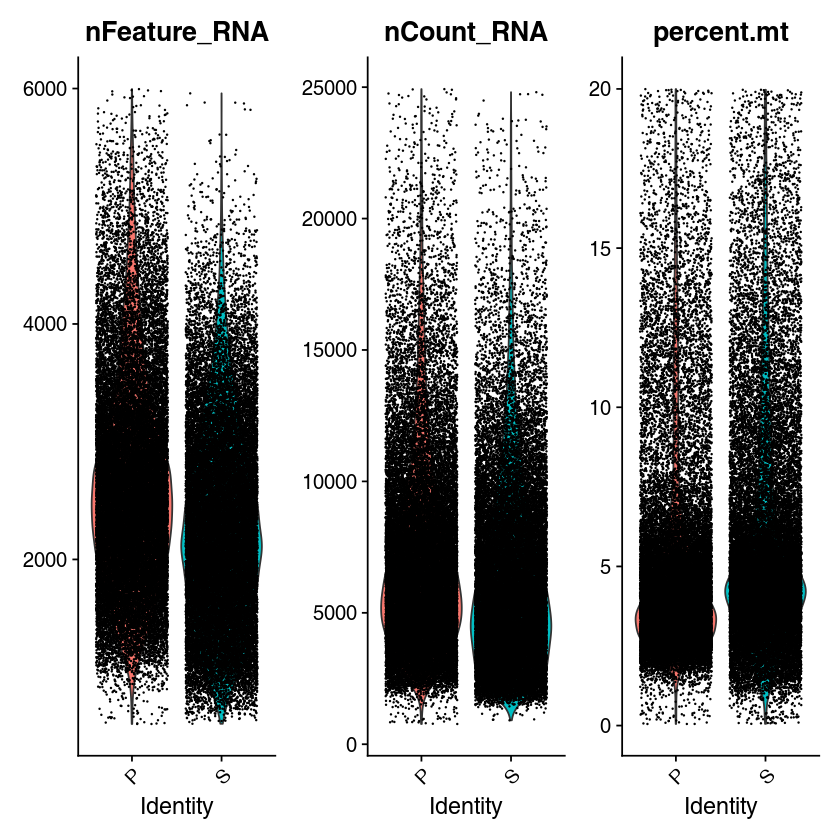

Normalizing layer: counts

Finding variable features for layer counts

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
"CombinePlots is being deprecated. Plots should now be combined using the patchwork system."
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous x-axis"


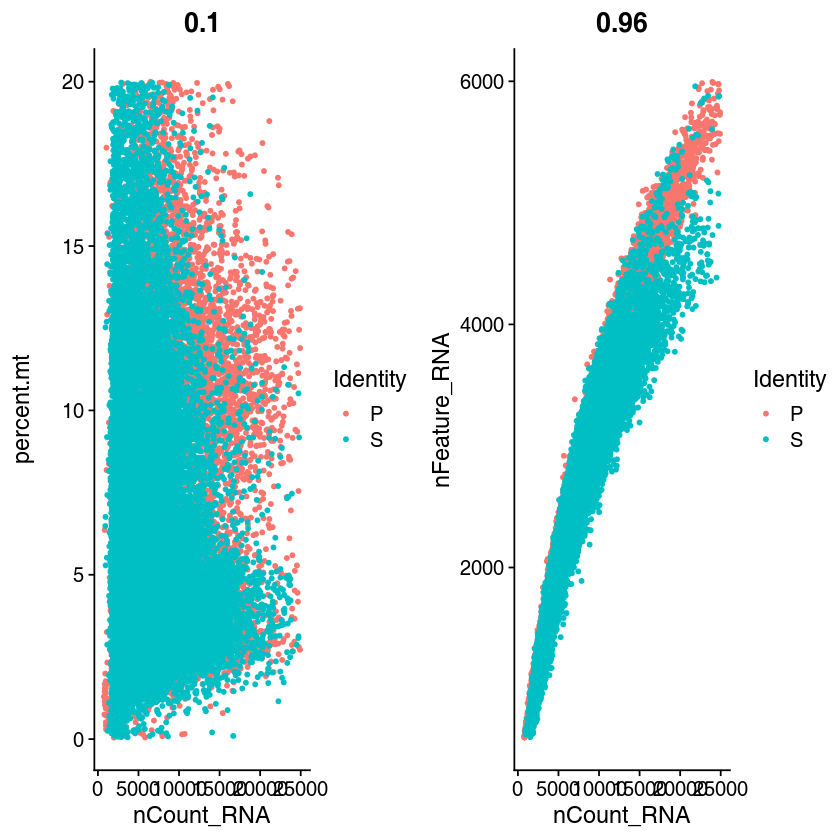

Regressing out nCount_RNA, percent.mt

Centering and scaling data matrix



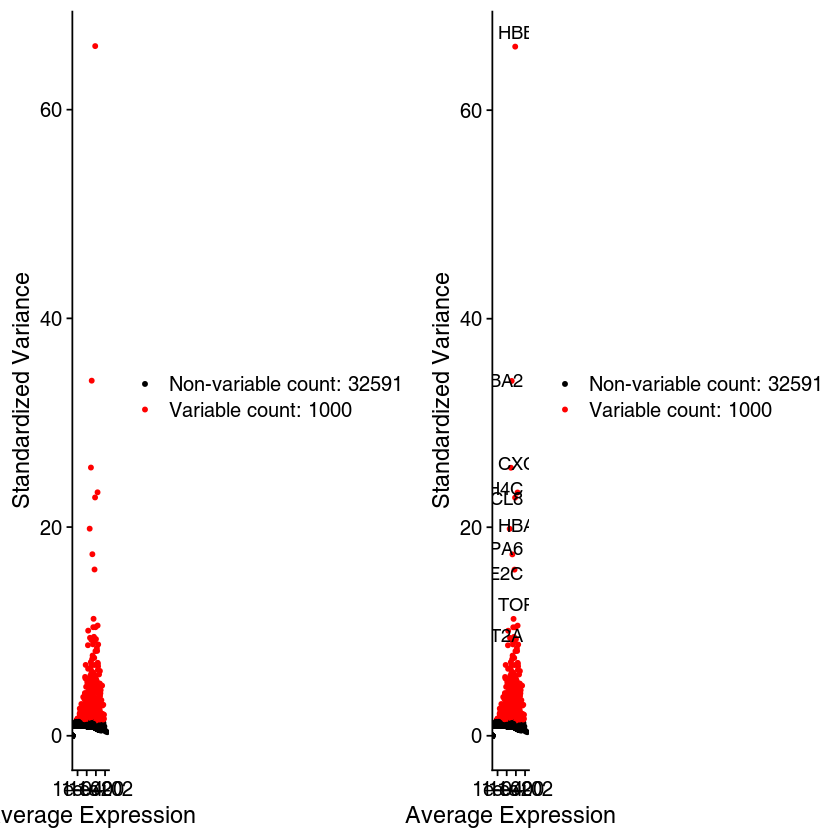

In [7]:
stromal[["percent.mt"]] <- PercentageFeatureSet(stromal, pattern = "^MT-")
VlnPlot(stromal, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

plot1 <- FeatureScatter(stromal, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(stromal, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

stromal <- NormalizeData(object = stromal, normalization.method = "LogNormalize", scale.factor = 10000)
stromal <- FindVariableFeatures(object = stromal,selection.method = "vst", nfeatures = 1000)
top10 <- head(VariableFeatures(stromal), 10)
plot1 <- VariableFeaturePlot(stromal)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
CombinePlots(plots = list(plot1, plot2))
stromal <- ScaleData(stromal,vars.to.regress = c("nCount_RNA", "percent.mt"))


In [8]:
Idents(stromal) <- "Menstrual"
Menstrual.markers <- FindAllMarkers(object = stromal, only.pos = TRUE, min.pct = 0.5, thresh.use =1)
FC1 <- Menstrual.markers[Menstrual.markers$avg_log2FC>1,]
head(FC1)
#write.csv(FC1,file="13EU_Menstrual_makers_FC1.csv")

Calculating cluster P

Calculating cluster S



,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
MMP11,0,5.751132,0.973,0.203,0,P,MMP11
PAMR1,0,3.782878,0.830,0.148,0,P,PAMR1
NREP,0,3.220598,0.895,0.249,0,P,NREP
CRABP2,0,2.966284,0.952,0.311,0,P,CRABP2
RBP7,0,3.603801,0.698,0.103,0,P,RBP7
MFAP2,0,2.777300,0.760,0.176,0,P,MFAP2


Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union


The following object is masked from 'package:SeuratObject':

    intersect


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packa

[1] 201

Warning message:
"Transformation introduced infinite values in continuous y-axis"
Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

Warning message in dfs(graph = graph, root = root, mode = mode, unreachable = unreachable, :
"Argument `neimode' is deprecated; use `mode' instead"
Warning message in dfs(graph = graph, root = root, mode = mode, unreachable = unreachable, :
"Argument `neimode' is deprecated; use `mode' instead"


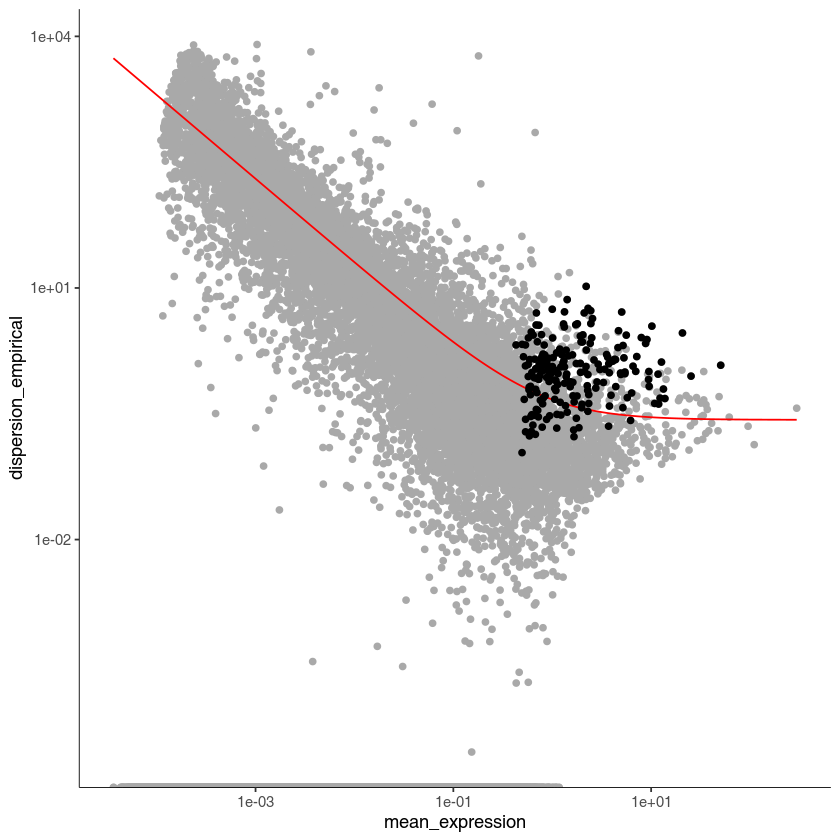

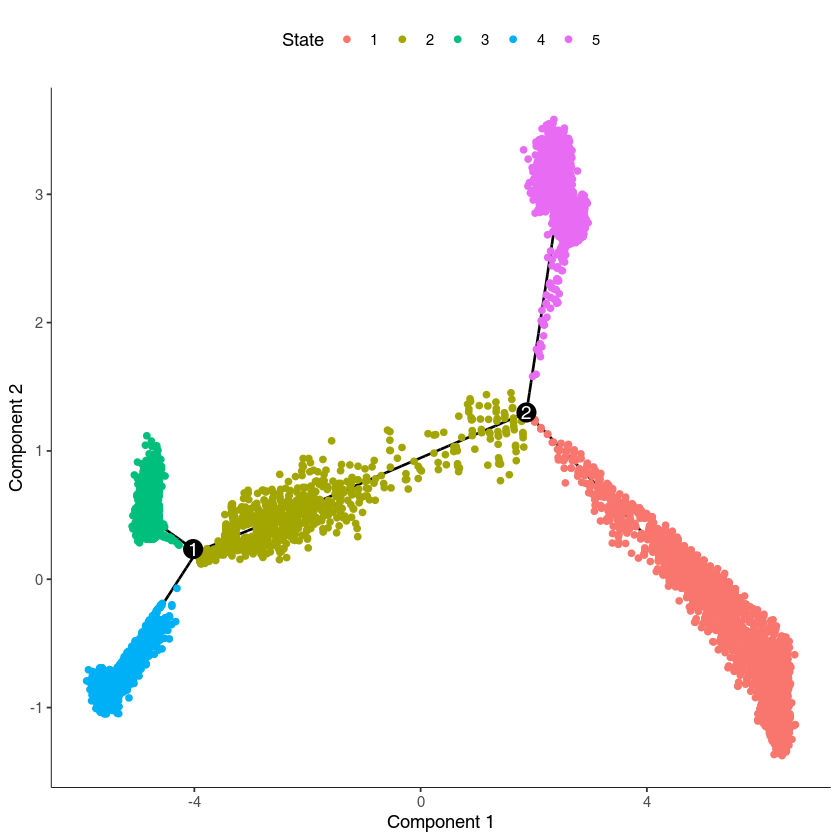

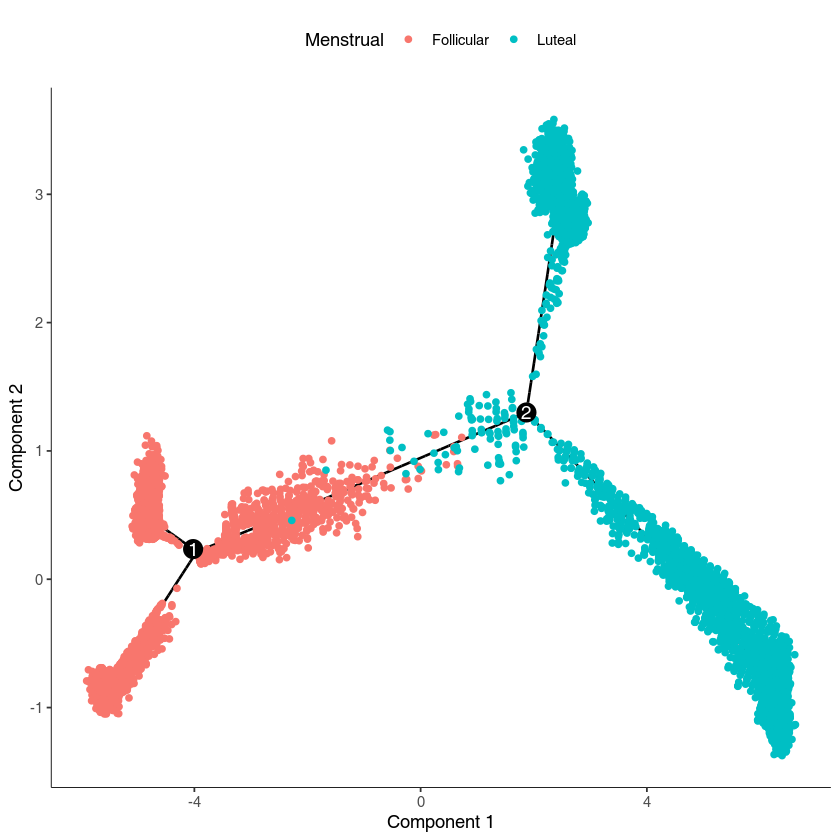

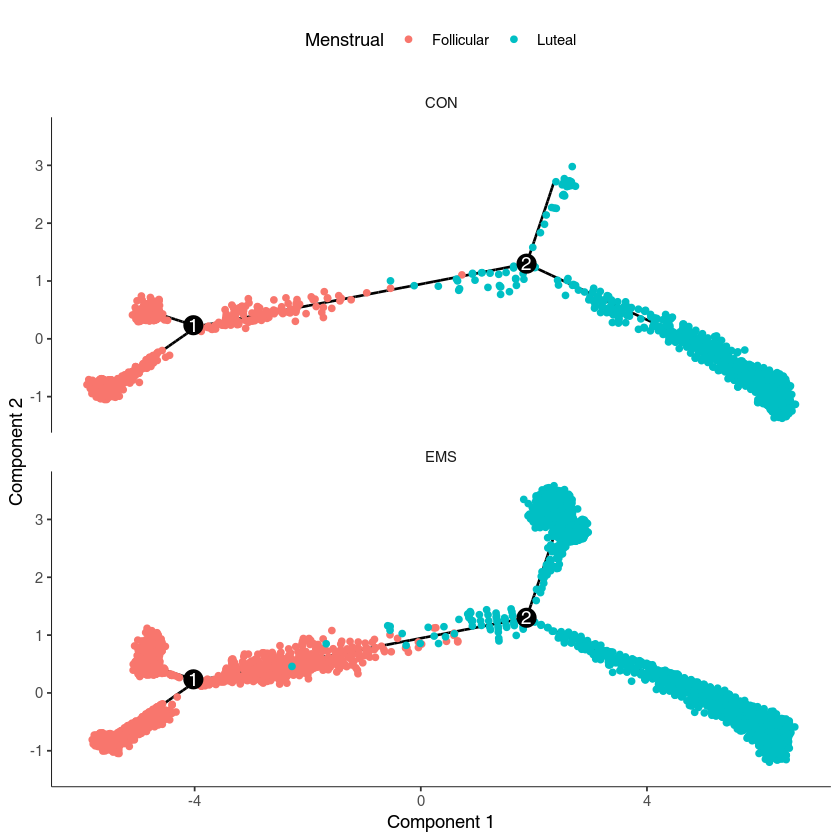

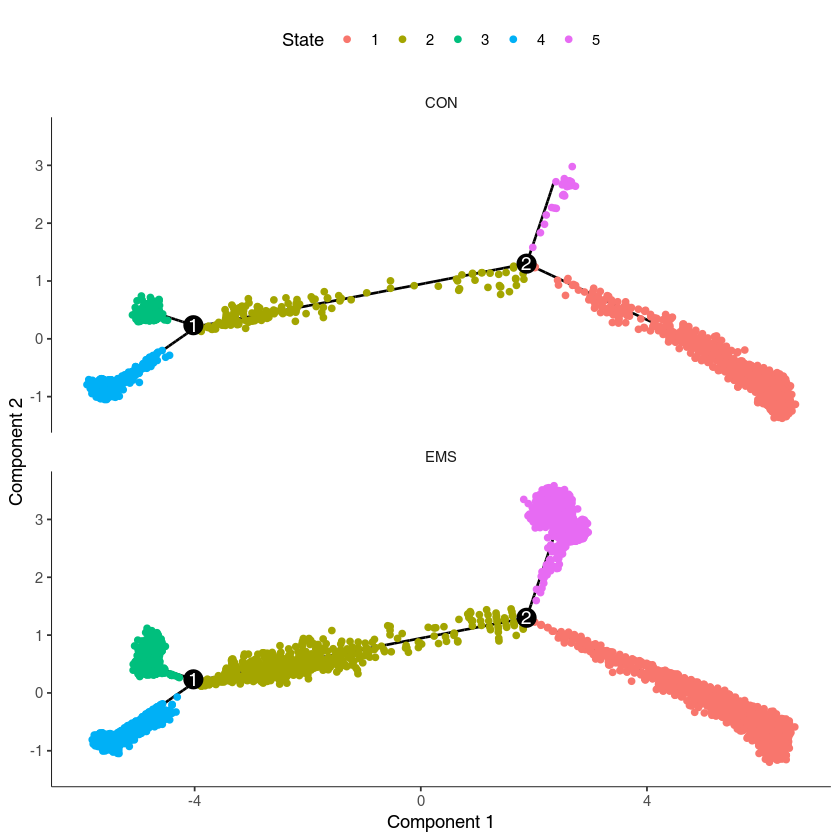

In [9]:
library(monocle)

EUstromals<-read.csv(file="/home/liusong/scRNA/endometriosis/V2data/scanpy/21samples/EUstroma15000cells/obs.csv",header=TRUE)
mydata<-subset(pbmc,cells=as.character(EUstromals$X))
mydata@meta.data$disease<-factor(mydata@meta.data$sampleID,levels=1:13,labels=rep(c("CON","EMS",'CON','EMS'),times=c(2,4,3,4)))
mydata@meta.data$Menstrual<-factor(mydata@meta.data$sampleID,levels=1:13,labels=rep(c("Follicular",'Luteal'),times=c(6,7)))

data <- as(as.matrix(mydata@assays$RNA@layers$counts), 'sparseMatrix')
pd <- new('AnnotatedDataFrame', data = mydata@meta.data)
fData <- data.frame(gene_short_name = row.names(mydata), row.names = row.names(mydata))
fd <- new('AnnotatedDataFrame', data = fData)
eumonocle <- newCellDataSet(data,phenoData = pd, featureData = fd,lowerDetectionLimit = 0.5, expressionFamily = negbinomial.size())

eumonocle<-estimateSizeFactors(eumonocle)
eumonocle<-estimateDispersions(eumonocle)
disp_table <- dispersionTable(eumonocle)
ordering_genes<-FC1$gene
length(ordering_genes)
eumonocle<-setOrderingFilter(eumonocle,ordering_genes)
plot_ordering_genes(eumonocle)

eumonocle<-reduceDimension(eumonocle,max_components=2,method="DDRTree")
eumonocle<-orderCells(eumonocle)
plot_cell_trajectory(eumonocle,color_by="State")
plot_cell_trajectory(eumonocle,color_by="Menstrual")
plot_cell_trajectory(eumonocle,color_by="Menstrual")+facet_wrap(~disease,nrow=2)
plot_cell_trajectory(eumonocle,color_by="State")+facet_wrap(~disease,nrow=2)
#saveRDS(eumonocle,file="13EU_15000EnS_orderby_201Menstrualgene_FC1_monocle.rds")

Warning message in dfs(graph = graph, root = root, mode = mode, unreachable = unreachable, :
"Argument `neimode' is deprecated; use `mode' instead"
Warning message in dfs(graph = graph, root = root, mode = mode, unreachable = unreachable, :
"Argument `neimode' is deprecated; use `mode' instead"


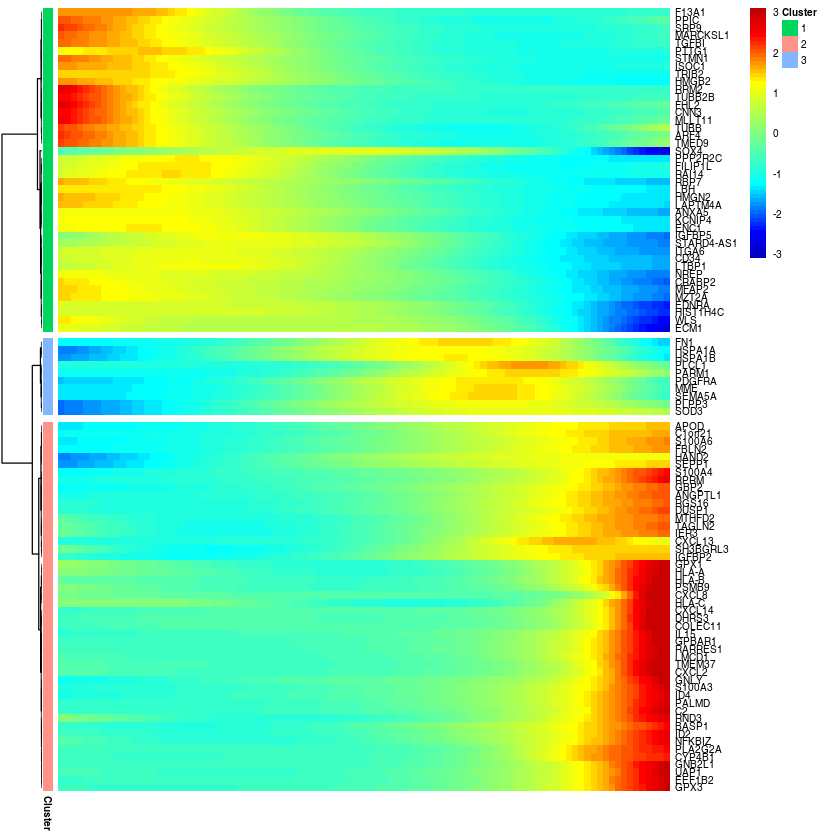

In [10]:
GM_state <- function(cds){
  if (length(unique(pData(cds)$State)) > 1){
    T0_counts <- table(pData(cds)$State, pData(cds)$State)[,"4"]
    return(as.numeric(names(T0_counts)[which
          (T0_counts == max(T0_counts))]))
  } else {
    return (1)
  }
}

newmonocle<-orderCells(eumonocle,root_state=GM_state(eumonocle))
diff_pseudo<-differentialGeneTest(newmonocle,fullModelFormulaStr="~sm.ns(Pseudotime)")
diff_pseudo<-diff_pseudo[order(diff_pseudo$qval),]
subdata_pseudo<-newmonocle[row.names(diff_pseudo[1:100,]),]
plot_pseudotime_heatmap(subdata_pseudo,cores=10,show_rownames=T,num_clusters=3)

In [17]:
saveRDS(newmonocle,file="13EU_15000EnS_orderby_201Menstrualgene_FC1_monocle_reordered.rds")
head(pData(newmonocle))

substroma<-subset(stromal,cells=as.character(EUstromals$X))
progene<-list(FC1$gene[FC1$cluster=="P"])
secgene<-list(FC1$gene[FC1$cluster=="S"])
substroma<-AddModuleScore(substroma,features=progene,ctrl=100,name="proscore")
substroma<-AddModuleScore(substroma,features=secgene,ctrl=100,name="secscore")
substroma@meta.data$pseudotime<-pData(newmonocle)$Pseudotime


,orig.ident,nCount_RNA,nFeature_RNA,sampleID,disease,Menstrual,Size_Factor,Pseudotime,State
,<fct>,<dbl>,<int>,<chr>,<fct>,<fct>,<dbl>,<dbl>,<fct>
AAACCTGAGGCAGGTT-1,SeuratProject,7546,2849,1,CON,Follicular,1.2651588,0.2198134,4
AAACCTGAGGTCATCT-1,SeuratProject,10273,3541,1,CON,Follicular,1.7223664,0.2630840,4
AAACCTGCAACAACCT-1,SeuratProject,5373,2300,1,CON,Follicular,0.9008347,2.7593677,3
AAACGGGAGACTCGGA-1,SeuratProject,7206,2714,1,CON,Follicular,1.2081546,2.7404038,3
AAAGATGAGCCGCCTA-1,SeuratProject,6230,2508,1,CON,Follicular,1.0445189,0.2621367,4
AAAGATGCACGACTCG-1,SeuratProject,11123,3498,1,CON,Follicular,1.8648770,0.2537783,4


,orig.ident,nCount_RNA,nFeature_RNA,sampleID,Menstrual,percent.mt,proscore1,secscore1,pseudotime
,<fct>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCTGAGGCAGGTT-1,SeuratProject,7546,2849,1,P,5.168301,0.6809485,-0.2666196,0.2198134
AAACCTGAGGTCATCT-1,SeuratProject,10273,3541,1,P,3.883968,0.5135640,-0.3584654,0.2630840
AAACCTGCAACAACCT-1,SeuratProject,5373,2300,1,P,5.509027,0.5931237,-0.3171571,2.7593677
AAACGGGAGACTCGGA-1,SeuratProject,7206,2714,1,P,5.953372,0.6855729,-0.2107252,2.7404038
AAAGATGAGCCGCCTA-1,SeuratProject,6230,2508,1,P,6.388443,0.5801129,-0.2666220,0.2621367
AAAGATGCACGACTCG-1,SeuratProject,11123,3498,1,P,5.906680,0.4989094,-0.2525451,0.2537783


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


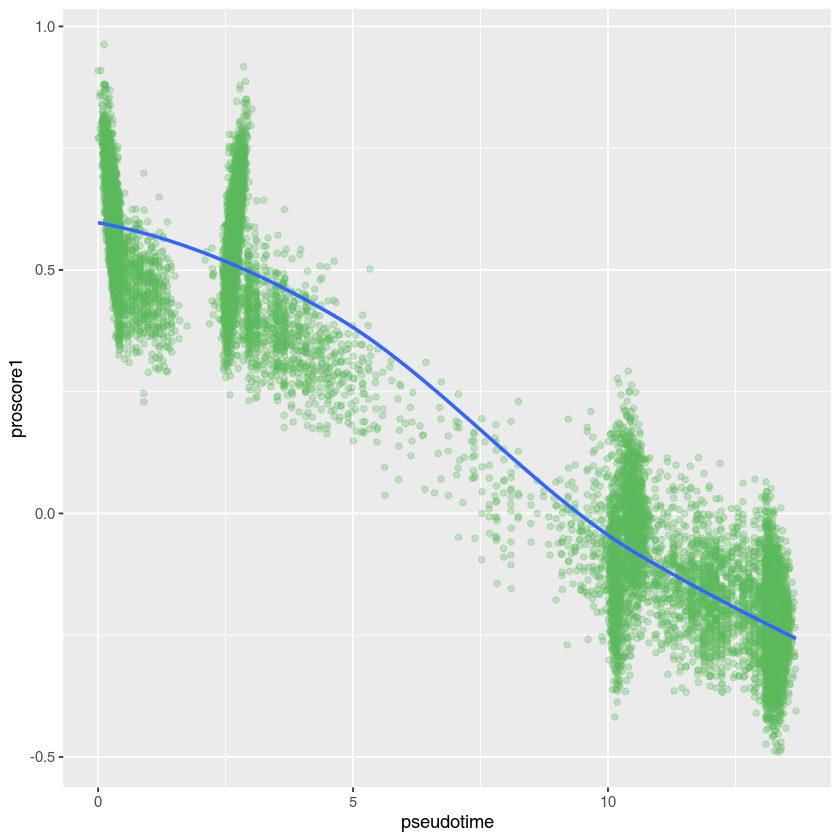

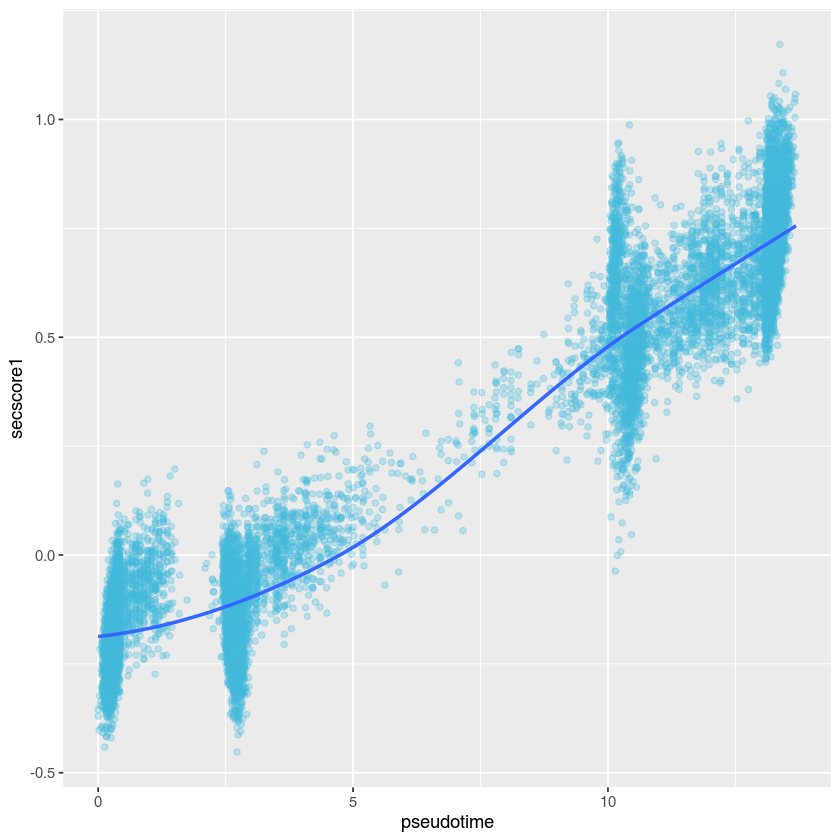

In [19]:
head(substroma@meta.data)
ggplot(substroma@meta.data,aes(x=pseudotime,y=proscore1))+geom_point(alpha=0.3,color="#5CB85CFF")+geom_smooth(method="loess")
ggplot(substroma@meta.data,aes(x=pseudotime,y=secscore1))+geom_point(alpha=0.3,color="#46B8DAFF")+geom_smooth(method="loess")